# Formation : Computer Vision with Python
## Séance 5 : Image classification with CNN
### Auteur : Nennouche Mohamed
### Date : 28/02/2022
### Contenu du notebook :
On va au cours de cette séance introduire l'utilisation de Tensorflow dans les problème de Computer Vision sur des problématiques de classification utilisant des CNN. Donc on fera dans ce notebook :  
- Introduction à Tensorflow 
- Comment créer un modèle avec Tensorflow
    - Méthode séquentielle
    - Méthode fonctionnelle
    - Méthode avec les classes
- Comment entrainer un modèle
- Comment évaluer un modèle
- Comment bien préparer les données pour les traiter avec Tensorflow

Pour se faire on va utiliser une partie du dataset [GTSRB](https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign) pour la classification de différents types de plaques de signalisation routière

## Introduction à Tensorflow avec MNIST

In [10]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme(style="dark")

# Pour la création du modèle
from tensorflow.keras.layers import Conv2D, Input, Dense, MaxPool2D, BatchNormalization, GlobalAvgPool2D

### Chargement des données

In [2]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()

print("x_train.shape = ",x_train.shape)
print("y_train.shape = ",y_train.shape)
print("x_test.shape = ",x_test.shape)
print("y_test.shape = ",y_test.shape)

x_train.shape =  (60000, 28, 28)
y_train.shape =  (60000,)
x_test.shape =  (10000, 28, 28)
y_test.shape =  (10000,)


On crée une fonction pour afficher un échantillon de notre dataset

In [7]:
def afficher_image(images,labels) :
    plt.figure(figsize=(14,14))
    for i in range(25) :
        index = np.random.randint(0, images.shape[0]-1)
        img = images[index]
        titre = labels[index]
        plt.subplot(5,5,i+1)
        plt.imshow(img,cmap='gray')
        plt.axis('off')
        plt.title(titre)

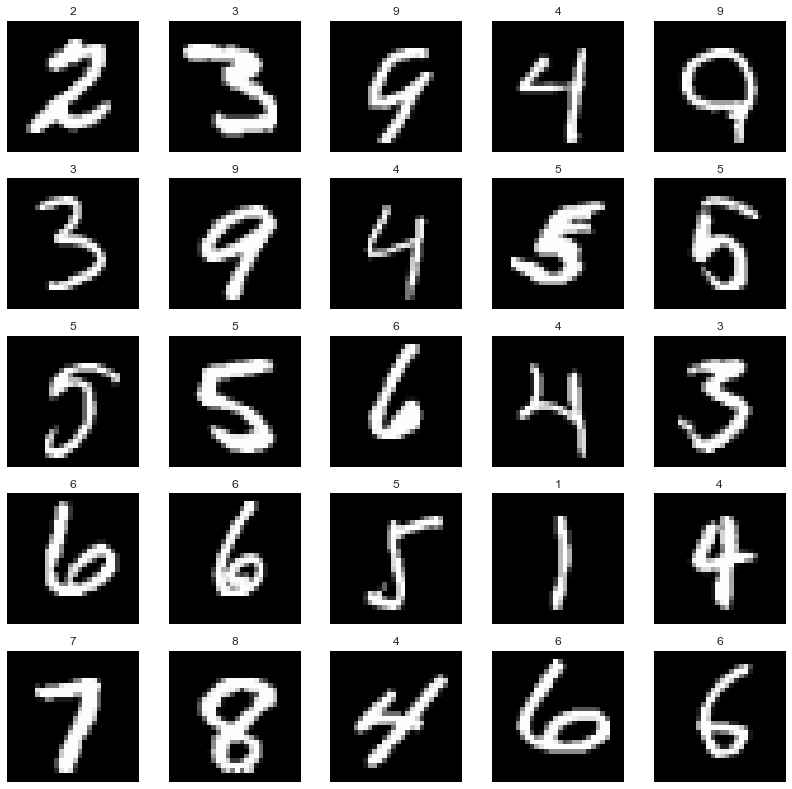

In [8]:
afficher_image(x_test,y_test)

### Mise en place d'un modèle

Pour la mise en place d'un modèle en Tensorflow on peut utiliser 3 approches avec exactement le même résultat : 
- Séquentielle : C'est la plus simple pour mettre en place un réseau de neurones
- Fonctionnelle : A travers une fonction qui retourne le modèle
- Classe : A travers une logique de POO, et donc une classe modèle et le reste en hérite

#### Explication des différentes couches qu'on va utiliser

a) Conv2D

![Conv2D](https://anhreynolds.com/img/cnn.png)

![Conv2D](https://miro.medium.com/max/1400/1*u2el-HrqRPVk7x0xlvs_CA.png)

b) MaxPool2D

![Max pooling](https://upload.wikimedia.org/wikipedia/commons/thumb/a/a6/Max-pool_2x2.png/348px-Max-pool_2x2.png)

c) BatchNormalization

Cette couche permet de recentrer et de renormaliser les données pour qu'ils s'adaptent au réseau de neurone. Donc ca permet d'avoir une moyenne des données proche de 0 et un écart type proche de 1, pour plus de détails voilà la [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/layers/BatchNormalization)

d) Dense

![Dense](https://carpentries-incubator.github.io/deep-learning-intro/fig/neural_network_sketch_dropout.png)

#### 1. Approche séquentielle

In [11]:
model = tf.keras.Sequential(
    [
        Input(shape=(28,28,1)), # format d'entrée
        Conv2D(32, (3,3), activation='relu'), # 32 filtres de taille 3x3 avec une fonction d'activation relu
        Conv2D(64, (3,3), activation='relu'),
        MaxPool2D(), # Pool size par défaut est de 2x2 avec un padding
        BatchNormalization(),
        Conv2D(128, (3,3), activation='relu'),
        MaxPool2D(),
        BatchNormalization(),

        GlobalAvgPool2D(),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax') # Couche finale (softmax pour faire une classification multi classe), on choisit 10 car il y a 10 classes !!
    ]
)

Pour avoir un récapitulatif (nombre de paramètres...) du modèle

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 12, 12, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 128)        0

##### Normalisation et reshaping des données

In [13]:
# Normalisation basique
x_train = x_train.astype('float32') / 255 # Pour éviter une division entière 
x_test = x_test.astype('float32') / 255

In [14]:
# On doit ajouter une dimension à l'image qui représente la dimension de niveaux de gris car pour l'instant les images sont en deux dimensions

x_train = np.expand_dims(x_train, axis=-1) # Ajouter une dimension à la fin
x_test = np.expand_dims(x_test, axis=-1)

print("x_train.shape = ",x_train.shape)
print("y_train.shape = ",y_train.shape)
print("x_test.shape = ",x_test.shape)
print("y_test.shape = ",y_test.shape)

x_train.shape =  (60000, 28, 28, 1)
y_train.shape =  (60000,)
x_test.shape =  (10000, 28, 28, 1)
y_test.shape =  (10000,)


##### Compilation et entraînement du modèle du modèle

In [15]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy') # pour categorical_crossentropy on a besoin de labels codé en one hot

In [16]:
model.fit(x_train, y_train, batch_size=64, epochs=3, validation_split=0.2) # on laisse 20% des images comme validation avant de faire le test

Epoch 1/3
750/750 [==============================] - 99s 130ms/step - loss: 0.2380 - accuracy: 0.9364 - val_loss: 0.1958 - val_accuracy: 0.9393
Epoch 2/3
750/750 [==============================] - 107s 142ms/step - loss: 0.0546 - accuracy: 0.9833 - val_loss: 0.0724 - val_accuracy: 0.9772
Epoch 3/3
750/750 [==============================] - 105s 140ms/step - loss: 0.0366 - accuracy: 0.9889 - val_loss: 0.0914 - val_accuracy: 0.9725


##### Evaluation du modèle

In [17]:
model.evaluate(x_test,y_test, batch_size=64)

157/157 [==============================] - 5s 30ms/step - loss: 0.0972 - accuracy: 0.9703


[0.09723388403654099, 0.970300018787384]

Si on veut utiliser la loss function : categorical_crossentropy il faut transformer les labels en format one hot comme suit :

In [18]:
y_train_onehot = tf.keras.utils.to_categorical(y_train, 10) # 10 c'est nombre de classes
y_test_onehot = tf.keras.utils.to_categorical(y_test, 10)

In [20]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [21]:
y_test_onehot

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [22]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

In [23]:
model.fit(x_train, y_train_onehot, batch_size=64, epochs=3, validation_split=0.2)
model.evaluate(x_test,y_test_onehot, batch_size=64)

Epoch 1/3
750/750 [==============================] - 109s 144ms/step - loss: 0.0329 - accuracy: 0.9896 - val_loss: 0.1392 - val_accuracy: 0.9556
Epoch 2/3
750/750 [==============================] - 133s 178ms/step - loss: 0.0228 - accuracy: 0.9930 - val_loss: 0.0423 - val_accuracy: 0.9877
Epoch 3/3
157/157 [==============================] - 7s 44ms/step - loss: 0.0481 - accuracy: 0.9858


[0.04806680977344513, 0.98580002784729]

#### 2. Approche fonctionnelle

In [25]:
def functional_model() :
    my_input = Input(shape=(28,28,1))
    x= Conv2D(32, (3,3), activation='relu')(my_input)
    x= Conv2D(64, (3,3), activation='relu')(x)
    x= MaxPool2D()(x)
    x= BatchNormalization()(x)

    x= Conv2D(128, (3,3), activation='relu')(x)
    x= MaxPool2D()(x)
    x= BatchNormalization()(x)

    x= GlobalAvgPool2D()(x)
    x= Dense(64, activation='relu')(x)
    x= Dense(10, activation='softmax')(x)

    model = tf.keras.Model(inputs=my_input, outputs=x)
    return model

##### Compilation, entrainement et évaluation du modèle

In [26]:
model = functional_model()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(x_train, y_train, batch_size=64, epochs=3, validation_split=0.2)
model.evaluate(x_test,y_test, batch_size=64)

Epoch 1/3
750/750 [==============================] - 116s 154ms/step - loss: 0.2242 - accuracy: 0.9397 - val_loss: 0.1052 - val_accuracy: 0.9694
Epoch 2/3
750/750 [==============================] - 119s 159ms/step - loss: 0.0546 - accuracy: 0.9836 - val_loss: 0.0544 - val_accuracy: 0.9832
Epoch 3/3
157/157 [==============================] - 7s 43ms/step - loss: 0.0576 - accuracy: 0.9823


[0.0576431043446064, 0.9822999835014343]

#### 3. Approche orienté objet

In [27]:
class myModel(tf.keras.Model) :

    def __init__(self) :
        super().__init__()
        self.conv1 = Conv2D(32, (3,3), activation='relu')
        self.conv2 = Conv2D(64, (3,3), activation='relu')
        self.maxpool1 = MaxPool2D()
        self.batchnorm1 = BatchNormalization()

        self.conv3 = Conv2D(128, (3,3), activation='relu')
        self.maxpool2 = MaxPool2D()
        self.batchnorm2 = BatchNormalization()

        self.globalavgpool1 = GlobalAvgPool2D()
        self.dense1 = Dense(64, activation='relu')
        self.dense2 = Dense(10, activation='softmax')

    def call(self,my_input) : # meme logique que fonctionnelle ici
        x= self.conv1(my_input)
        x= self.conv2(x)
        x= self.maxpool1(x)
        x= self.batchnorm1(x)

        x= self.conv3(x)
        x= self.maxpool2(x)
        x= self.batchnorm2(x)

        x= self.globalavgpool1(x)
        x= self.dense1(x)
        x= self.dense2(x)

        return x

##### Compilation, entrainement et évaluation du modèle

In [28]:
model = myModel()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(x_train, y_train, batch_size=64, epochs=3, validation_split=0.2)
model.evaluate(x_test,y_test, batch_size=64)

Epoch 1/3
750/750 [==============================] - 108s 143ms/step - loss: 0.2279 - accuracy: 0.9378 - val_loss: 0.1451 - val_accuracy: 0.9548
Epoch 2/3
750/750 [==============================] - 117s 156ms/step - loss: 0.0555 - accuracy: 0.9824 - val_loss: 0.1107 - val_accuracy: 0.9674
Epoch 3/3
157/157 [==============================] - 7s 44ms/step - loss: 0.1071 - accuracy: 0.9662


[0.10705195367336273, 0.9661999940872192]